<a href="https://colab.research.google.com/github/Belvanz/proyek-analisis-data/blob/main/Bike_sharing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Belvan Savero Achmady]
- **Email:** [belvansavero049@gmail.com]
- **ID Dicoding:** [MS106D5Y0529]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda berdasarkan musim?
2. Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [18]:
# Memuat Dataset
day_df = pd.read_csv("https://raw.githubusercontent.com/Belvanz/proyek-analisis-data/refs/heads/main/Bike-sharing-dataset/day.csv")

# Menampilkan 5 baris pertama pada Dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# Memuat Dataset
hour_df = pd.read_csv("https://raw.githubusercontent.com/Belvanz/proyek-analisis-data/refs/heads/main/Bike-sharing-dataset/hour.csv")

# Menampilkan 5 baris pertama pada Dataset
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat dua dataset yaitu dataset day.csv dan hour.csv.
- Menampilkan 5 baris pertama pada setiap dataset.

### Assessing Data

In [20]:
# Menampilkan informasi tentang Dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [21]:
# Menampilkan informasi tentang Dataset
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [26]:
# Memeriksa duplikasi data di data Day
day_duplicates = day_df.duplicated().sum()
print(f"Jumlah duplikasi di Day Data: {day_duplicates}")

# Memeriksa duplikasi data di data Hour
hour_duplicates = hour_df.duplicated().sum()
print(f"Jumlah duplikasi di Hour Data: {hour_duplicates}")

Jumlah duplikasi di Day Data: 0
Jumlah duplikasi di Hour Data: 0


In [27]:
# Memeriksa missing values di data Day
print(day_df.isnull().sum())
print("Missing values in Day Data:")

# Memeriksa missing values di data Hour
print(hour_df.isnull().sum())
print("\nMissing values in Hour Data:")

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values in Day Data:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in Hour Data:


In [30]:
# Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [31]:
# Memeriksa parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat duplikasi data.
- Tidak terdapat missing value.

### Cleaning Data

In [35]:
# Mengganti tipe kolom dteday ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- Mengganti tipe kolom dteday ke datetime.


## Exploratory Data Analysis (EDA)

### Explore ...

In [38]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [40]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


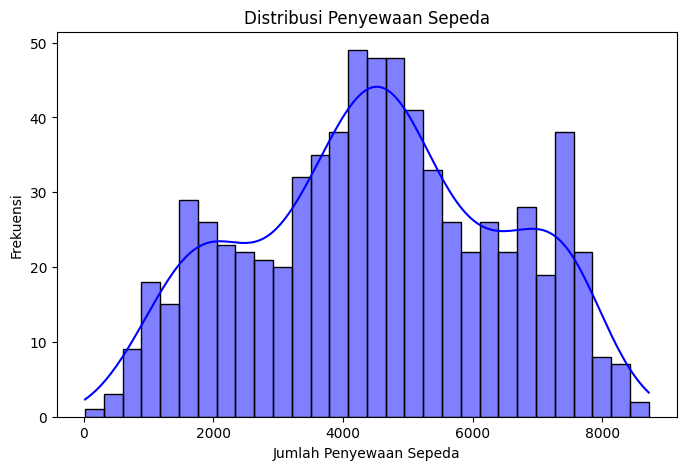

In [48]:
# Histogram Distribusi Penyewaan Sepeda
plt.figure(figsize=(8, 5))
sns.histplot(day_df["cnt"], bins=30, kde=True, color="blue")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Penyewaan Sepeda")
plt.show()

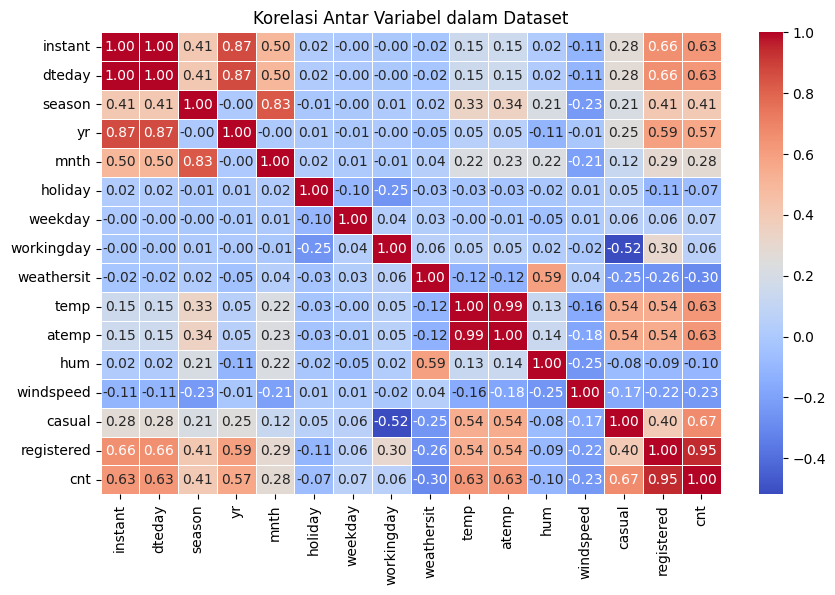

In [49]:
# Heatmap korelasi antar variabel
plt.figure(figsize=(10, 6))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Variabel dalam Dataset")
plt.show()

<ipython-input-51-8dc463a87a15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weekday", y="cnt", data=day_df, palette="Set2")


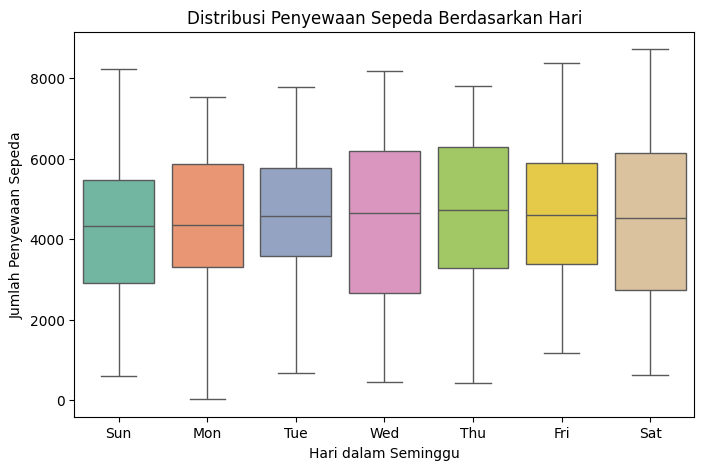

In [51]:
# Box plot Penyewaan Sepeda Berdasarkan Hari dalam Seminggu
plt.figure(figsize=(8, 5))
sns.boxplot(x="weekday", y="cnt", data=day_df, palette="Set2")
plt.xticks(ticks=range(7), labels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari")
plt.show()

<ipython-input-52-4b25d1a922fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=day_df, estimator=sum, palette="coolwarm")


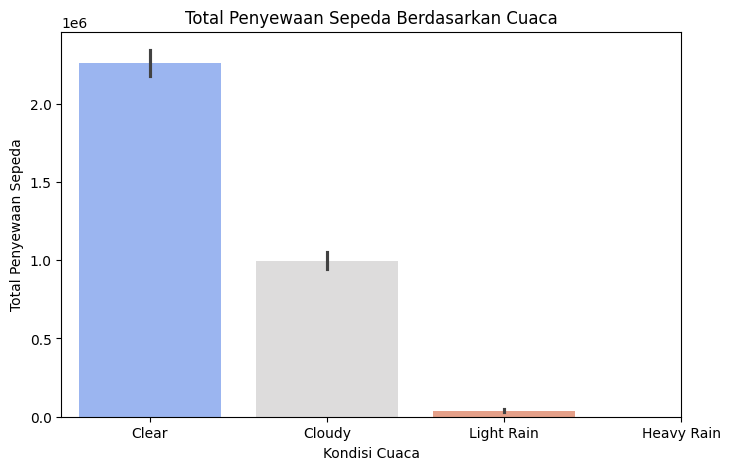

In [52]:
# Bar plot Penyewaan Sepeda Berdasarkan Cuaca**
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", data=day_df, estimator=sum, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Cloudy", "Light Rain", "Heavy Rain"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Total Penyewaan Sepeda Berdasarkan Cuaca")
plt.show()

**Insight:**
- Cuaca Berpengaruh Terhadap Jumlah Penyewaan Sepeda.
- Penyewaan Sepeda Meningkat pada Hari Kerja dibanding Akhir Pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-53-cea2ac6191d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df["season"], y=day_df["cnt"], estimator=sum, palette="coolwarm")


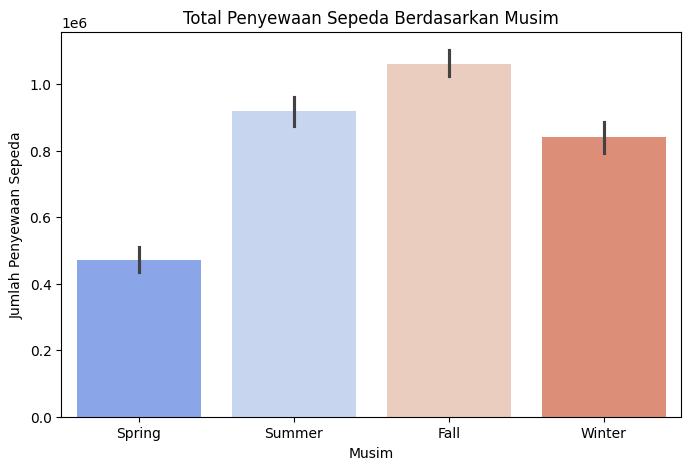

In [53]:
# Visualisasi Pola Penyewaan Sepeda berdasarkan Musim
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df["season"], y=day_df["cnt"], estimator=sum, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")
plt.show()

### Pertanyaan 2:

<ipython-input-55-6830a77c4b72>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df["hr"], y=hour_df["cnt"], estimator="mean", ci=None, marker="o")


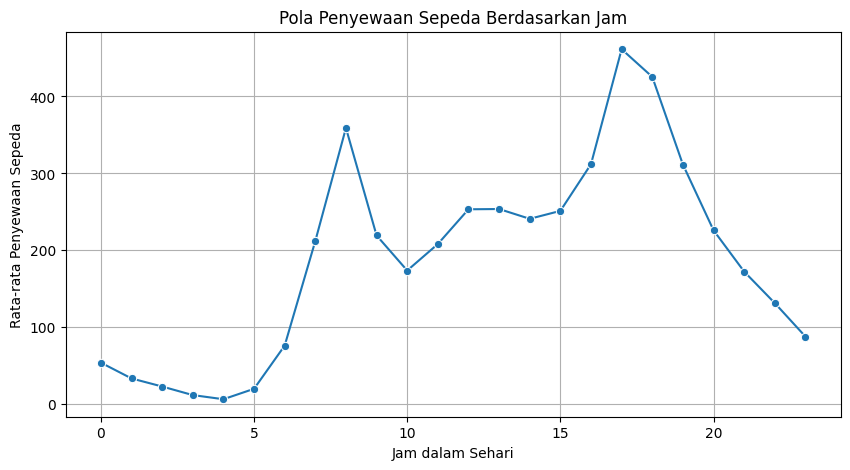

In [55]:
# Visualisasi Pola Penyewaan Sepeda Berdasarkan Jam
plt.figure(figsize=(10, 5))
sns.lineplot(x=hour_df["hr"], y=hour_df["cnt"], estimator="mean", ci=None, marker="o")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam")
plt.grid(True)
plt.show()

**Insight:**
- Menunjukan Total penyewaan sepeda berdasarkan musim.
  Dari grafik, terlihat bahwa musim tertentu memiliki jumlah penyewaan lebih tinggi dibandingkan yang lain. Ini bisa digunakan untuk mengatur jumlah sepeda yang tersedia di setiap musim.

- Pola penyewaan sepeda berdasarkan jam dalam sehari.
  Grafik menunjukkan pola penggunaan sepeda yang meningkat pada jam-jam tertentu, kemungkinan saat jam sibuk (pagi dan sore). Ini berguna untuk mengoptimalkan alokasi sepeda.

## Analisis Lanjutan (Opsional)

<ipython-input-56-2764ec578820>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="mnth", y="cnt", data=day_df, estimator="mean", ci=None, marker="o", color="blue")


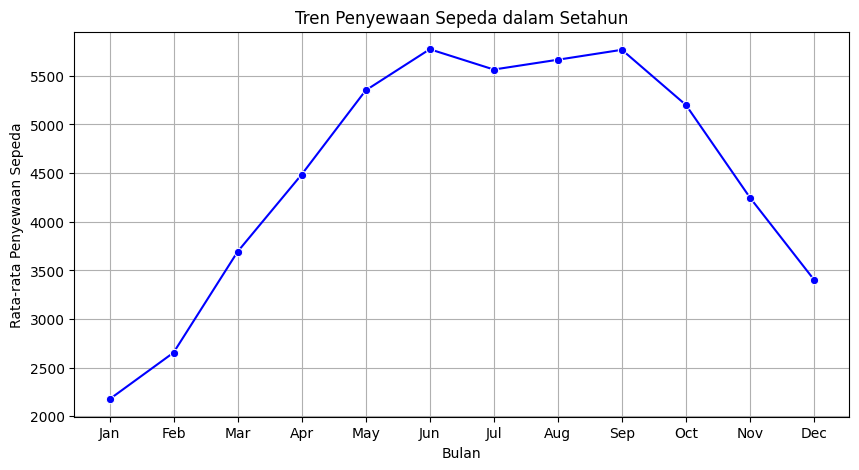

In [56]:
# Lineplot Tren Penyewaan Sepeda dalam Setahun
plt.figure(figsize=(10, 5))
sns.lineplot(x="mnth", y="cnt", data=day_df, estimator="mean", ci=None, marker="o", color="blue")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda dalam Setahun")
plt.grid(True)
plt.show()

Dari lineplot tren penyewaan per bulan, terlihat bahwa jumlah penyewaan meningkat saat musim panas (Mei - September) dan menurun saat musim dingin (Desember - Februari). Hal ini menunjukkan bahwa musim panas memiliki permintaan tinggi, sehingga operator bisa melakukan promo selama bulan-bulan tersebut.


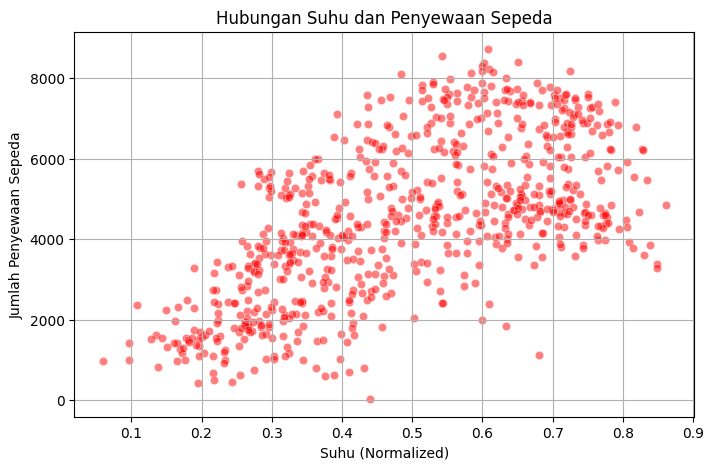

In [57]:
# Scatterplot Suhu vs Jumlah Penyewaan Sepeda**
plt.figure(figsize=(8, 5))
sns.scatterplot(x="temp", y="cnt", data=day_df, alpha=0.5, color="red")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Hubungan Suhu dan Penyewaan Sepeda")
plt.grid(True)
plt.show()

Dari scatterplot suhu vs penyewaan, terlihat pola bahwa penyewaan meningkat seiring kenaikan suhu, tetapi menurun jika suhu terlalu tinggi atau terlalu rendah. Ini menunjukkan bahwa pengguna merasa nyaman menyewa sepeda dalam suhu sedang, tetapi cenderung menghindari suhu ekstrem.

## Conclusion

1. Conclusion 1 : **Bagaimana pola penggunaan sepeda berdasarkan musim?**
   - Penyewaan sepeda tertinggi terjadi pada musim gugur (Fall) dan musim panas (Summer), sedangkan penyewaan terendah terjadi pada musim dingin (Winter).Hal ini menunjukkan bahwa cuaca yang lebih hangat dan stabil mendorong lebih banyak orang untuk menggunakan sepeda, sementara cuaca dingin mengurangi jumlah penyewaan.

2. Conclusion 2 : **Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari?**
   - Penyewaan sepeda memiliki dua puncak utama:
Pagi (sekitar pukul 07:00 - 09:00) yang kemungkinan besar digunakan untuk perjalanan ke kantor/sekolah.
Sore (sekitar pukul 17:00 - 19:00) yang digunakan untuk perjalanan pulang kerja atau aktivitas setelah jam kerja.
Penyewaan sepeda lebih rendah di siang hari dan sangat rendah pada malam hari.

